In [0]:
!pip install --upgrade -q gspread

In [0]:
import numpy as np
import pandas as pd

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
worksheet = gc.open('Technical Data Analyst - Take Home Dataset').sheet1
rows= worksheet.get_all_records()
data=pd.DataFrame(data=rows)

In [0]:
worksheet2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1AU6oEKJuP5EUTSxZpyq8RiBWRPwJU0152wh_5YGeni4/edit#gid=101049589').get_worksheet(1)
rows2= worksheet2.get_all_records()
data2=pd.DataFrame(data=rows2)

In [10]:
data.iloc[0, 1] > data2.iloc[0, 1]

False

In [0]:
data2

I don't know if this is relevant (possibly misunderstood) but the idea was to iterate over both dataframes to see which venue type values meet the confidence level threshold

In [11]:
high_alert_trigger_count =0
for a, b in zip(data.iloc[:, 1], data2.iloc[:, 1]):
  if b>a:
    high_alert_trigger_count+=1
high_alert_trigger_count

2209

In [12]:
low_alert_trigger_count =0
for a, b in zip(data.iloc[:, 2], data2.iloc[:, 2]):
  if b>a:
    low_alert_trigger_count+=1

low_alert_trigger_count

1529

In [0]:
med_alert_trigger_count =0
for a, b in zip(data.iloc[:, 3], data2.iloc[:, 3]):
  if b>a:
    med_alert_trigger_count+=1

med_alert_trigger_count

2209

In [0]:
verylow_alert_trigger_count =0
for a, b in zip(data.iloc[:, 4], data2.iloc[:, 4]):
  if b>a:
    verylow_alert_trigger_count+=1

verylow_alert_trigger_count

2209

In [0]:
np.where(data['what=pcheckins-created-by-level.func=Sum.level=High.mtype=alert'] < data2['what=pcheckins-created-by-type.func=Sum.type=home'])

(array([   0,    1,    2, ..., 2206, 2207, 2208]),)

In [0]:
data2.loc[:, 'DateTime'] = pd.to_datetime(data2['DateTime'])
data2.sort_values(by=['DateTime'],inplace=True)
data2.loc[:, 'Day']=data2['DateTime'].dt.strftime('%B %d %Y')
data2.loc[:, 'Month']=data2['DateTime'].dt.strftime('%B')
data2.loc[:, 'Month-Year']=data2['DateTime'].dt.strftime('%B %Y')

December had the highest number of counts while October had the least.

In [57]:
data2.groupby(['Month-Year']).count()

,DateTime,what=pcheckins-created-by-type.func=Sum.type=home,what=pcheckins-created-by-type.func=Sum.type=unknown,what=pcheckins-created-by-type.func=Sum.type=venue,what=pcheckins-created-by-type.func=Sum.type=work,Day,Month
Month-Year,,,,,,,
December 2017,744,744,744,744,744,744,744
January 2018,737,737,737,737,737,737,737
November 2017,720,720,720,720,720,720,720
October 2017,8,8,8,8,8,8,8


In [63]:
data2.groupby(['Month-Year']).count().max()

DateTime                                                744
what=pcheckins-created-by-type.func=Sum.type=home       744
what=pcheckins-created-by-type.func=Sum.type=unknown    744
what=pcheckins-created-by-type.func=Sum.type=venue      744
what=pcheckins-created-by-type.func=Sum.type=work       744
Day                                                     744
Month                                                   744
dtype: int64

In [15]:
data2.groupby(['Month']).count()

,DateTime,what=pcheckins-created-by-type.func=Sum.type=home,what=pcheckins-created-by-type.func=Sum.type=unknown,what=pcheckins-created-by-type.func=Sum.type=venue,what=pcheckins-created-by-type.func=Sum.type=work,Day,Month-Year
Month,,,,,,,
December,744,744,744,744,744,744,744
January,737,737,737,737,737,737,737
November,720,720,720,720,720,720,720
October,8,8,8,8,8,8,8


In [62]:
data2.groupby(['Month-Year']).describe()

what=pcheckins-created-by-type.func=Sum.type=home                                                                                     what=pcheckins-created-by-type.func=Sum.type=unknown                                                                                what=pcheckins-created-by-type.func=Sum.type=venue                                                                                    what=pcheckins-created-by-type.func=Sum.type=work                                                                                  
                                                          count          mean            std        min        25%        50%        75%        max                                                count           mean           std       min       25%       50%       75%       max                                              count          mean           std        min        25%        50%        75%        max                                             count           mean            std       min       25%       50%        75%        max
Month-Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
December 2017                                             744.0  1.353682e+06  435650.288953   176210.0   959714.0  1252633.0  1782407.0  2303180.0                                              744.0    122667.049731  48853.432372   37542.0   81930.5  117560.0  148930.0  365996.0                                              744.0  2.395191e+06  1.001955e+06   230370.0  1448605.0  2291308.0  3282625.5  4508556.0                                             744.0  709417.334677  428389.921464   74696.0  357368.0  556161.0  1132678.0  1613480.0
January 2018                                              737.0  1.206252e+06  491460.344515   545362.0   734834.0  1095914.0  1707524.0  2286286.0                                              737.0     21452.107311  23378.575594    4716.0    9538.0   14416.0   20650.0  134524.0                                              737.0  2.648569e+06  1.118842e+06   855550.0  1557490.0  2531430.0  3744624.0  4837764.0                                             737.0  614381.063772  402094.935137   91226.0  292108.0  448248.0  1051232.0  1579106.0
November 2017                                             720.0  1.464401e+06  433923.614201   804340.0  1067900.5  1341845.0  1886161.5  2402452.0                                              720.0    155612.172222  53261.880626   64272.0  104507.0  156980.0  202592.5  260510.0                                              720.0  2.335476e+06  9.610519e+05   802480.0  1406029.5  2260719.0  3240459.0  4156062.0                                             720.0  792719.913889  447486.903230  157516.0  414703.5  621914.0  1315265.5  1628786.0
October 2017                                                8.0  2.092984e+06  252506.660883  1616202.0  1979249.5  2109371.0  2252495.5  2429006.0                                                8.0    186716.500000  37630.708110  127878.0  155881.0  197584.0  215812.5  229772.0                                                8.0  2.615251e+06  8.429595e+05  1580552.0  1847288.0  2600397.0  3333649.5  3692322.0                                               8.0  772771.000000  310756.321908  449236.0  546491.0  676724.0   925977.5  1349774.0

In [17]:
#Data + Dates for when alertType(Low) for unknown was Triggered
data2[['Day','what=pcheckins-created-by-type.func=Sum.type=unknown']][(data2['what=pcheckins-created-by-type.func=Sum.type=unknown'] > data['what=pcheckins-created-by-level.func=Sum.level=Low.mtype=alert'])].groupby(['Day']).count()

,what=pcheckins-created-by-type.func=Sum.type=unknown
Day,
December 01 2017,24
December 02 2017,24
December 03 2017,24
December 04 2017,24
December 05 2017,24
December 06 2017,24
December 07 2017,24
December 08 2017,24
December 09 2017,24


In [18]:
#Data + Dates for when alertType(Low) for unknown was NOT Triggered
data2[['Day','what=pcheckins-created-by-type.func=Sum.type=unknown']][(data2['what=pcheckins-created-by-type.func=Sum.type=unknown'] < data['what=pcheckins-created-by-level.func=Sum.level=Low.mtype=alert'])].groupby(['Day']).count()

,what=pcheckins-created-by-type.func=Sum.type=unknown
Day,
January 03 2018,17
January 04 2018,22
January 05 2018,24
January 06 2018,24
January 07 2018,24
January 08 2018,24
January 09 2018,24
January 10 2018,24
January 11 2018,24


In [0]:
data2[['Month','what=pcheckins-created-by-type.func=Sum.type=unknown']][(data2['what=pcheckins-created-by-type.func=Sum.type=unknown'] > data['what=pcheckins-created-by-level.func=Sum.level=Low.mtype=alert'])].groupby(['Month']).count()

,what=pcheckins-created-by-type.func=Sum.type=unknown
Month,
December,744
January,57
November,720
October,8


In [19]:
#ALL TRIGGERED DATA
# data2[(data['what=pcheckins-created-by-level.func=Sum.level=High.mtype=alert'] < data2['what=pcheckins-created-by-type.func=Sum.type=home'])& \
# (data['what=pcheckins-created-by-level.func=Sum.level=Low.mtype=alert'] < data2['what=pcheckins-created-by-type.func=Sum.type=unknown'])&\
# (data['what=pcheckins-created-by-level.func=Sum.level=Med.mtype=alert'] < data2['what=pcheckins-created-by-type.func=Sum.type=venue'])&\
# (data['what=pcheckins-created-by-level.func=Sum.level=VeryLow.mtype=alert'] < data2['what=pcheckins-created-by-type.func=Sum.type=work'])].groupby(['Month-Year']).count()

,DateTime,what=pcheckins-created-by-type.func=Sum.type=home,what=pcheckins-created-by-type.func=Sum.type=unknown,what=pcheckins-created-by-type.func=Sum.type=venue,what=pcheckins-created-by-type.func=Sum.type=work,Day,Month
Month-Year,,,,,,,
December 2017,744,744,744,744,744,744,744
January 2018,737,737,737,737,737,737,737
November 2017,720,720,720,720,720,720,720
October 2017,8,8,8,8,8,8,8


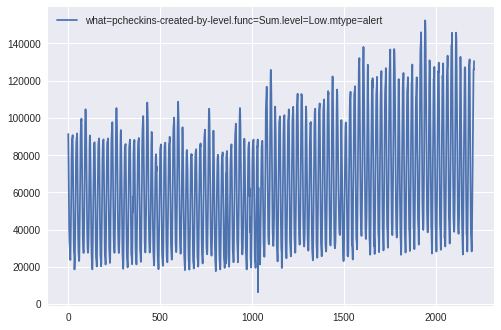

In [20]:
import matplotlib.pylab as plt
from pandas import Series
from matplotlib import pyplot
data[['what=pcheckins-created-by-level.func=Sum.level=Low.mtype=alert' ]].plot()
pyplot.show()

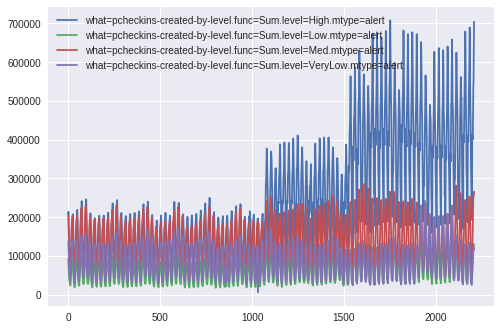

In [64]:
data.plot()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
data2.loc[:, 'DateTime'] = pd.to_datetime(data2['DateTime'])
data2.loc[:, 'DateTime']= data2['DateTime'].dt.strftime('%Y/%m/%d ')
data2.loc[:, 'DateTime'] = pd.to_datetime(data2['DateTime'])
datagraph= data2.groupby(['DateTime']).count().copy()
#datagraph.set_index('DateTime', inplace=True)
datagraph.drop(columns=['Day', 'Month','Month-Year'],inplace=True)

In [54]:
datagraph

,what=pcheckins-created-by-type.func=Sum.type=home,what=pcheckins-created-by-type.func=Sum.type=unknown,what=pcheckins-created-by-type.func=Sum.type=venue,what=pcheckins-created-by-type.func=Sum.type=work
DateTime,,,,
2017-10-31,8,8,8,8
2017-11-01,24,24,24,24
2017-11-02,24,24,24,24
2017-11-03,24,24,24,24
2017-11-04,24,24,24,24
2017-11-05,24,24,24,24
2017-11-06,24,24,24,24
2017-11-07,24,24,24,24
2017-11-08,24,24,24,24


So from what I can glean from the trend in this data, the first (2017-10-31) & last(2018-01-31) dates had the lowest counts, 8 and 17. All other days had #24.

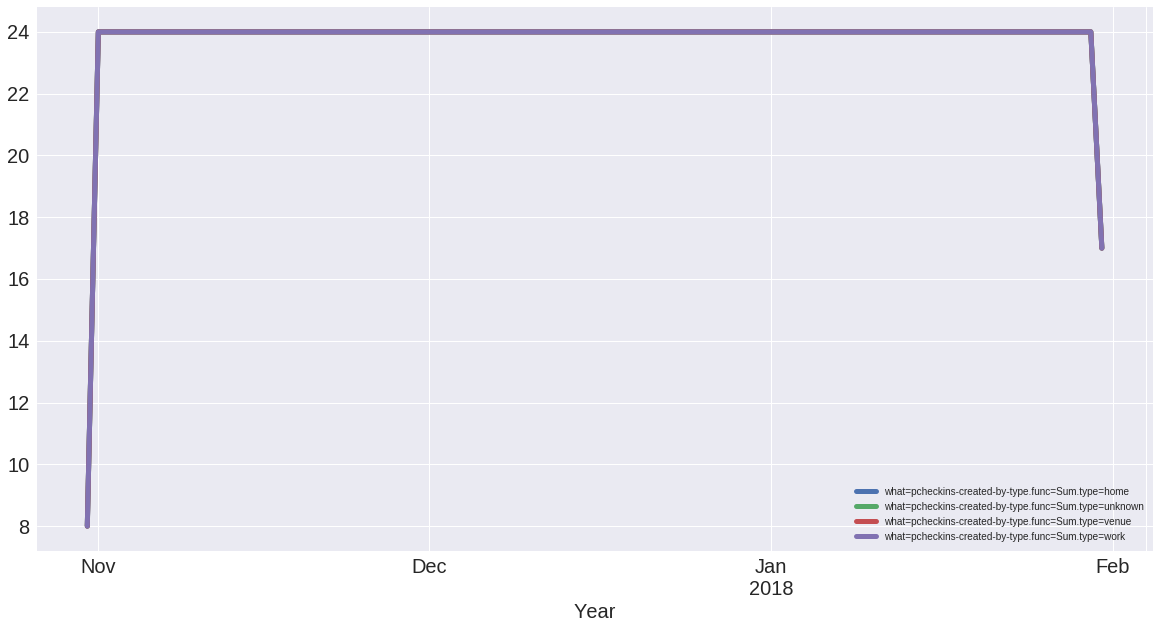

In [55]:
datagraph.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [0]:
datagraph2= data.copy()
datagraph2.set_index('DateTime', inplace=True)

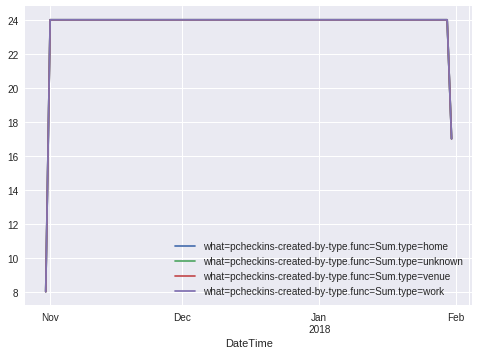

In [56]:
plt.figure(); datagraph.plot(); plt.legend(loc='best')

In [78]:
! jupyter nbconvert Assignment.ipynb


[NbConvertApp] WARNING | pattern u'Assignment.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nb

In [75]:
%%html

UsageError: %%html is a cell magic, but the cell body is empty.
